# Random Forest Classifier

In this notebook, I will:
- Understand what a Random Forest is  
- Train it on the Iris dataset  
- Compare its performance with a single Decision Tree  
- Visualise feature importance  
- Discuss how ensembles reduce overfitting


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay


In [2]:
# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 120
Testing samples: 30


In [3]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
acc_tree = accuracy_score(y_test, y_pred_tree)

print(f"Decision Tree Accuracy: {acc_tree:.2f}")


Decision Tree Accuracy: 1.00


In [4]:
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)
acc_forest = accuracy_score(y_test, y_pred_forest)

print(f"Random Forest Accuracy: {acc_forest:.2f}")


Random Forest Accuracy: 1.00


In [5]:
print("=== Decision Tree Report ===")
print(classification_report(y_test, y_pred_tree, target_names=data.target_names))

print("\n=== Random Forest Report ===")
print(classification_report(y_test, y_pred_forest, target_names=data.target_names))


=== Decision Tree Report ===
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


=== Random Forest Report ===
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



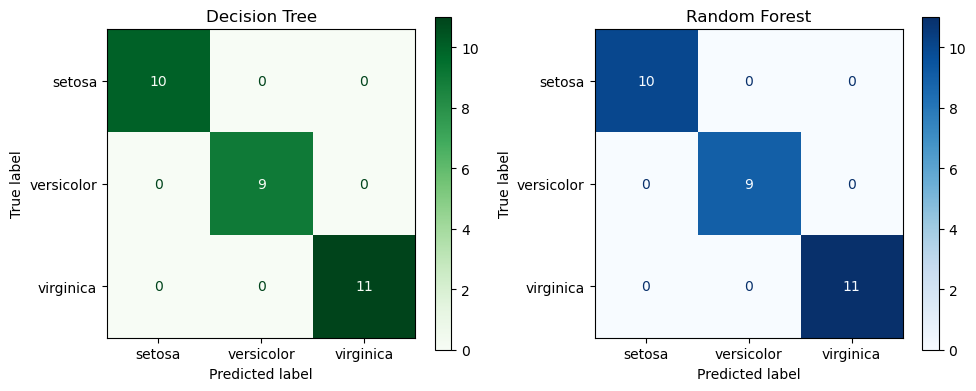

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ConfusionMatrixDisplay.from_estimator(tree, X_test, y_test, display_labels=data.target_names, cmap="Greens", ax=axes[0])
axes[0].set_title("Decision Tree")

ConfusionMatrixDisplay.from_estimator(forest, X_test, y_test, display_labels=data.target_names, cmap="Blues", ax=axes[1])
axes[1].set_title("Random Forest")

plt.tight_layout()
plt.show()


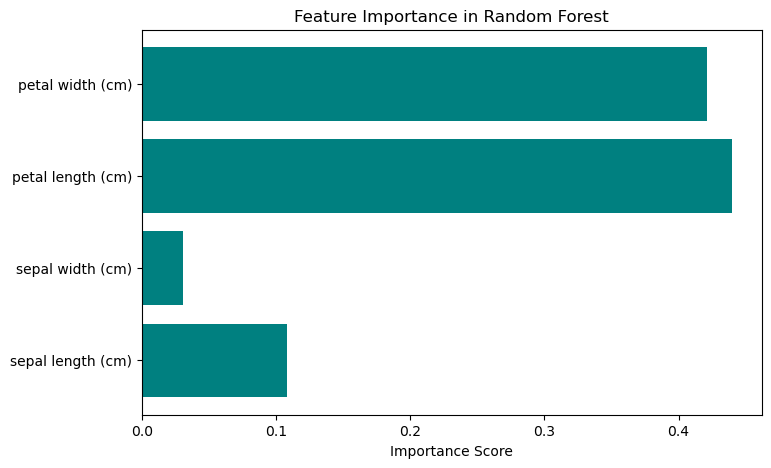

sepal length (cm)        : 0.108
sepal width (cm)         : 0.030
petal length (cm)        : 0.440
petal width (cm)         : 0.422


In [7]:
importances = forest.feature_importances_
features = data.feature_names

plt.figure(figsize=(8,5))
plt.barh(features, importances, color='teal')
plt.xlabel("Importance Score")
plt.title("Feature Importance in Random Forest")
plt.show()

for feature, importance in zip(features, importances):
    print(f"{feature:25}: {importance:.3f}")


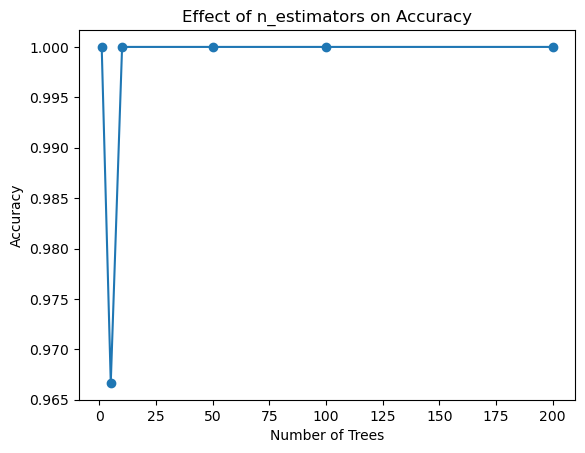

In [8]:
n_estimators = [1, 5, 10, 50, 100, 200]
accuracies = []

for n in n_estimators:
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.plot(n_estimators, accuracies, marker='o')
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.title("Effect of n_estimators on Accuracy")
plt.show()


Summary

- Random Forest is an ensemble of Decision Trees trained on random subsets of data and features.
- It reduces overfitting by averaging predictions.
- As we increase the number of trees (`n_estimators`), performance tends to stabilize.
- Feature importance helps identify which features are most influential.
- Compared to a single Decision Tree, Random Forests are more robust and generalisable, even though the accuracy was perfect in this data set for both because the data set is quite simple. Will be working on more complex data sets in the future.
